# **1. ANÁLISIS DE SENTIMIENTO**

## 1.1 Importando desde el dataset

In [2]:
import pandas as pd

In [3]:
df_articles = pd.read_csv("news.csv", sep='|')

In [4]:
# Vemos las columnas del dataframe
df_articles.columns

Index(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt',
       'content', 'categoria', 'source_id', 'source_name', 'text'],
      dtype='object')

## 1.2. Función para realizar la tokenización retirando los stopwords y devuelve en mayúsculas

In [5]:
# 2-4 Tokenizacion, POS tagging, eliminacion de Stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
# Aplicando la función
df_articles['POS tagged'] = df_articles['text'].apply(token_stop_pos)
df_articles.head()

,author,title,description,url,urlToImage,publishedAt,content,categoria,source_id,source_name,text,POS tagged
0,Sarah Ritter,johnson county city s new downtown booming wit...,the concentration of cool stuff is working we...,https://www.kansascity.com/news/business/devel...,https://media.zenfs.com/en/kansas_city_star_mc...,2023-09-19T10:30:00Z,dozens of shoppers filed through lenexas farme...,politic,NaN,Kansas City Star,johnson county city s new downtown booming wit...,"[(johnson, a), (county, n), (city, n), (new, a..."
1,Nico Hall,bisexuality queerness labels perception a conv...,autostraddle s editor in chief and head bisexu...,http://www.autostraddle.com/bisexuality-queern...,https://www.autostraddle.com/wp-content/upload...,2023-09-20T20:05:47Z,nico autostraddle membership director and head...,politic,NaN,Autostraddle.com,bisexuality queerness labels perception a conv...,"[(bisexuality, n), (queerness, n), (labels, n)..."
2,largeheartedboy,jared joseph s playlist for his novel danny th...,danny the ambulance is the classic tale of a ...,https://largeheartedboy.com/2023/09/20/jared-j...,NaN,2023-09-20T16:11:23Z,in the book notes series authors create and di...,politic,NaN,Largeheartedboy.com,jared joseph s playlist for his novel danny th...,"[(jared, a), (joseph, n), (playlist, n), (nove..."
3,Matt Welch,media critics agree stop interviewing the bad ...,journalism s in house critics take a bold stan...,https://reason.com/2023/09/20/media-critics-ag...,https://d2eehagpk5cl65.cloudfront.net/img/q60/...,2023-09-20T17:06:20Z,on sunday nbc s meet the press which has been ...,politic,NaN,Reason,media critics agree stop interviewing the bad ...,"[(media, n), (critics, n), (agree, v), (stop, ..."
4,Mark Z. Barabak,column donald trump is rotten and despicable b...,donald trump should never hold office again bu...,https://www.latimes.com/politics/story/2023-09...,https://ca-times.brightspotcdn.com/dims4/defau...,2023-09-20T10:00:54Z,donald trump is a cancer on the body politic a...,politic,NaN,Los Angeles Times,column donald trump is rotten and despicable b...,"[(column, n), (donald, n), (trump, n), (rotten..."


## 1.3. Lematización

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
  lemma_rew = " "
  for word, pos in pos_data:
    if not pos:
      lemma = word
      lemma_rew = lemma_rew + " " + lemma
    else:
      lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
      lemma_rew = lemma_rew + " " + lemma

    return lemma_rew

df_articles['Lemma'] = df_articles['POS tagged'].apply(lemmatize)
df_articles.head()

,author,title,description,url,urlToImage,publishedAt,content,categoria,source_id,source_name,text,POS tagged,Lemma
0,Sarah Ritter,johnson county city s new downtown booming wit...,the concentration of cool stuff is working we...,https://www.kansascity.com/news/business/devel...,https://media.zenfs.com/en/kansas_city_star_mc...,2023-09-19T10:30:00Z,dozens of shoppers filed through lenexas farme...,politic,NaN,Kansas City Star,johnson county city s new downtown booming wit...,"[(johnson, a), (county, n), (city, n), (new, a...",johnson
1,Nico Hall,bisexuality queerness labels perception a conv...,autostraddle s editor in chief and head bisexu...,http://www.autostraddle.com/bisexuality-queern...,https://www.autostraddle.com/wp-content/upload...,2023-09-20T20:05:47Z,nico autostraddle membership director and head...,politic,NaN,Autostraddle.com,bisexuality queerness labels perception a conv...,"[(bisexuality, n), (queerness, n), (labels, n)...",bisexuality
2,largeheartedboy,jared joseph s playlist for his novel danny th...,danny the ambulance is the classic tale of a ...,https://largeheartedboy.com/2023/09/20/jared-j...,NaN,2023-09-20T16:11:23Z,in the book notes series authors create and di...,politic,NaN,Largeheartedboy.com,jared joseph s playlist for his novel danny th...,"[(jared, a), (joseph, n), (playlist, n), (nove...",jared
3,Matt Welch,media critics agree stop interviewing the bad ...,journalism s in house critics take a bold stan...,https://reason.com/2023/09/20/media-critics-ag...,https://d2eehagpk5cl65.cloudfront.net/img/q60/...,2023-09-20T17:06:20Z,on sunday nbc s meet the press which has been ...,politic,NaN,Reason,media critics agree stop interviewing the bad ...,"[(media, n), (critics, n), (agree, v), (stop, ...",medium
4,Mark Z. Barabak,column donald trump is rotten and despicable b...,donald trump should never hold office again bu...,https://www.latimes.com/politics/story/2023-09...,https://ca-times.brightspotcdn.com/dims4/defau...,2023-09-20T10:00:54Z,donald trump is a cancer on the body politic a...,politic,NaN,Los Angeles Times,column donald trump is rotten and despicable b...,"[(column, n), (donald, n), (trump, n), (rotten...",column


## 1.4. Analisis de sentimientos con Texblod

In [8]:
from textblob import TextBlob

In [9]:
# Funcion para calcular la subjetividad
def getSubjetividady(review):
    return TextBlob(review).sentiment.subjectivity

# Funcion para calcular la polaridad
def getPolaridad(review):
    return TextBlob(review).sentiment.polarity

# Funcion para analizar los comentarios
def analisis_polaridad(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
# Creamos dataframe para realizar el análisis
#title_analizado = pd.DataFrame(df_articles[['text', 'Lemma']])

df_articles['polarity'] = df_articles['Lemma'].apply(getPolaridad)
df_articles['sentiment'] = df_articles['polarity'].apply(analisis_polaridad)
df_articles.head()

,author,title,description,url,urlToImage,publishedAt,content,categoria,source_id,source_name,text,POS tagged,Lemma,polarity,sentiment
0,Sarah Ritter,johnson county city s new downtown booming wit...,the concentration of cool stuff is working we...,https://www.kansascity.com/news/business/devel...,https://media.zenfs.com/en/kansas_city_star_mc...,2023-09-19T10:30:00Z,dozens of shoppers filed through lenexas farme...,politic,NaN,Kansas City Star,johnson county city s new downtown booming wit...,"[(johnson, a), (county, n), (city, n), (new, a...",johnson,0.0,Neutral
1,Nico Hall,bisexuality queerness labels perception a conv...,autostraddle s editor in chief and head bisexu...,http://www.autostraddle.com/bisexuality-queern...,https://www.autostraddle.com/wp-content/upload...,2023-09-20T20:05:47Z,nico autostraddle membership director and head...,politic,NaN,Autostraddle.com,bisexuality queerness labels perception a conv...,"[(bisexuality, n), (queerness, n), (labels, n)...",bisexuality,0.0,Neutral
2,largeheartedboy,jared joseph s playlist for his novel danny th...,danny the ambulance is the classic tale of a ...,https://largeheartedboy.com/2023/09/20/jared-j...,NaN,2023-09-20T16:11:23Z,in the book notes series authors create and di...,politic,NaN,Largeheartedboy.com,jared joseph s playlist for his novel danny th...,"[(jared, a), (joseph, n), (playlist, n), (nove...",jared,0.0,Neutral
3,Matt Welch,media critics agree stop interviewing the bad ...,journalism s in house critics take a bold stan...,https://reason.com/2023/09/20/media-critics-ag...,https://d2eehagpk5cl65.cloudfront.net/img/q60/...,2023-09-20T17:06:20Z,on sunday nbc s meet the press which has been ...,politic,NaN,Reason,media critics agree stop interviewing the bad ...,"[(media, n), (critics, n), (agree, v), (stop, ...",medium,0.0,Neutral
4,Mark Z. Barabak,column donald trump is rotten and despicable b...,donald trump should never hold office again bu...,https://www.latimes.com/politics/story/2023-09...,https://ca-times.brightspotcdn.com/dims4/defau...,2023-09-20T10:00:54Z,donald trump is a cancer on the body politic a...,politic,NaN,Los Angeles Times,column donald trump is rotten and despicable b...,"[(column, n), (donald, n), (trump, n), (rotten...",column,0.0,Neutral


In [11]:
#Obtenemos el conteo de por el análisis
detalle_analisis = df_articles.sentiment.value_counts()
detalle_analisis

Neutral     3199
Positive     304
Negative      75
Name: sentiment, dtype: int64

## 1.5. Analisis de sentimientos con Vader

In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [14]:
# Función para aplicar VADER
sentimiento = SentimentIntensityAnalyzer()

def vader_sentimiento_analisis(review):
    vs = sentimiento.polarity_scores(review)
    return vs['compound']

df_articles['vader_sentimient'] = df_articles['Lemma'].apply(vader_sentimiento_analisis)

# function to analyse
def vader_analisis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

df_articles['vader_analysis'] = df_articles['vader_sentimient'].apply(vader_analisis)
df_articles.head()

,author,title,description,url,urlToImage,publishedAt,content,categoria,source_id,source_name,text,POS tagged,Lemma,polarity,sentiment,vader_sentimient,vader_analysis
0,Sarah Ritter,johnson county city s new downtown booming wit...,the concentration of cool stuff is working we...,https://www.kansascity.com/news/business/devel...,https://media.zenfs.com/en/kansas_city_star_mc...,2023-09-19T10:30:00Z,dozens of shoppers filed through lenexas farme...,politic,NaN,Kansas City Star,johnson county city s new downtown booming wit...,"[(johnson, a), (county, n), (city, n), (new, a...",johnson,0.0,Neutral,0.0,Neutral
1,Nico Hall,bisexuality queerness labels perception a conv...,autostraddle s editor in chief and head bisexu...,http://www.autostraddle.com/bisexuality-queern...,https://www.autostraddle.com/wp-content/upload...,2023-09-20T20:05:47Z,nico autostraddle membership director and head...,politic,NaN,Autostraddle.com,bisexuality queerness labels perception a conv...,"[(bisexuality, n), (queerness, n), (labels, n)...",bisexuality,0.0,Neutral,0.0,Neutral
2,largeheartedboy,jared joseph s playlist for his novel danny th...,danny the ambulance is the classic tale of a ...,https://largeheartedboy.com/2023/09/20/jared-j...,NaN,2023-09-20T16:11:23Z,in the book notes series authors create and di...,politic,NaN,Largeheartedboy.com,jared joseph s playlist for his novel danny th...,"[(jared, a), (joseph, n), (playlist, n), (nove...",jared,0.0,Neutral,0.0,Neutral
3,Matt Welch,media critics agree stop interviewing the bad ...,journalism s in house critics take a bold stan...,https://reason.com/2023/09/20/media-critics-ag...,https://d2eehagpk5cl65.cloudfront.net/img/q60/...,2023-09-20T17:06:20Z,on sunday nbc s meet the press which has been ...,politic,NaN,Reason,media critics agree stop interviewing the bad ...,"[(media, n), (critics, n), (agree, v), (stop, ...",medium,0.0,Neutral,0.0,Neutral
4,Mark Z. Barabak,column donald trump is rotten and despicable b...,donald trump should never hold office again bu...,https://www.latimes.com/politics/story/2023-09...,https://ca-times.brightspotcdn.com/dims4/defau...,2023-09-20T10:00:54Z,donald trump is a cancer on the body politic a...,politic,NaN,Los Angeles Times,column donald trump is rotten and despicable b...,"[(column, n), (donald, n), (trump, n), (rotten...",column,0.0,Neutral,0.0,Neutral


In [15]:
# Contando el análisis
vader_counts = df_articles['vader_analysis'].value_counts()
vader_counts

Neutral     3443
Positive     113
Negative      22
Name: vader_analysis, dtype: int64

## 1.6. Visualización de los resultados de Text Blob y Vader para el Análisis de Sentimientos

([<matplotlib.patches.Wedge at 0x7a25e45cf460>,
 [Text(-1.039653983257862, 0.3593321514922669, 'Neutral'),
  Text(1.0137548308698388, -0.4269673791849499, 'Positive'),
  Text(1.3470739120433186, -0.08883622848989978, 'Negative')],
 [Text(-0.5670839908679247, 0.1959993553594183, '89.4%'),
  Text(0.5529571804744574, -0.23289129773724537, '8.5%'),
  Text(0.8481576483235709, -0.055933921641788745, '2.1%')])

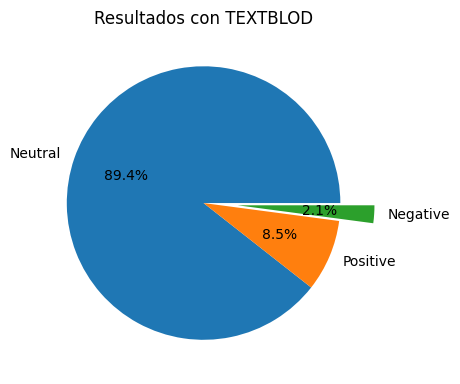

In [16]:
# Graficando el resultado del análisis con TEXTBLOB
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Resultados con TEXTBLOD")
plt.pie(detalle_analisis.values, labels = detalle_analisis.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

<ipython-input-17-860efc662d61>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vader_counts = vader_counts.append(pd.Series(0.0, index=['Etiqueta_A', 'Etiqueta_B', 'Etiqueta_C']))


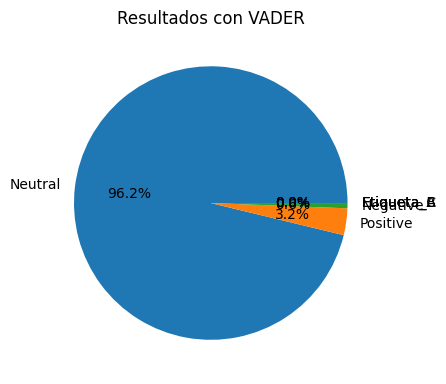

In [17]:
# Graficando el resultado del análisis con VADER

import matplotlib.pyplot as plt
vader_counts = vader_counts.append(pd.Series(0.0, index=['Etiqueta_A', 'Etiqueta_B', 'Etiqueta_C']))

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 2)
plt.title("Resultados con VADER")

explode = [0.0] * len(vader_counts)
plt.pie(vader_counts.values, labels=vader_counts.index, explode=explode, autopct='%1.1f%%', shadow=False)
plt.show()


## Exportar a CSV el nuevo dataset

In [18]:
print(df_articles.columns)

Index(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt',
       'content', 'categoria', 'source_id', 'source_name', 'text',
       'POS tagged', 'Lemma', 'polarity', 'sentiment', 'vader_sentimient',
       'vader_analysis'],
      dtype='object')


In [19]:
# Vamos a exportar los sentimientos obtenidos mediante Texblod
df_export = df_articles.drop(columns=['vader_sentimient', 'vader_analysis'])
df_export.to_csv('news_sentiment.csv', sep='|', index=False)

# **2. CREACION DE GRAFO Y METRICAS:**

## 2.1. Función para Obtener las similitudes de las noticias

In [37]:
def generate_similarity_pairs(dataframe):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(dataframe['title'])

    threshold = 0.4

    # Calcular la similitud de Jaccard
    jaccard_sim = cosine_similarity(X)

    # Encontrar las parejas similares
    similar_pairs = []
    for i in range(len(dataframe)):
        for j in range(i + 1, len(dataframe)):
            if jaccard_sim[i, j] >= threshold:
                similar_pairs.append((dataframe.loc[i, 'title'], dataframe.loc[j, 'title'], jaccard_sim[i, j]))

    return similar_pairs

## 2.2 Obtener las similitudes de nuestro dataset

In [27]:
similar_pairs = generate_similarity_pairs(df_articles)

# Mostrar las parejas similares
for str1, str2, sim in similar_pairs:
    print(f"Similitud entre '{str1}' || '{str2}' (similitud de Jaccard: {sim})")

Similitud entre 'convicted murderer billy chemirmir killed by cellmate in texas prison tdcj' || 'man suspected of murdering people killed by cellmate in prison officials' (similitud de Jaccard: 0.4545454545454546)
Similitud entre 'the shadow race to succeed mitch mcconnell' || 'the race to carve up the moon' (similitud de Jaccard: 0.4629100498862757)
Similitud entre 'a field guide to the borderlands hispanicheritagemonth latinxheritagemonth' || 'the marketer s ultimate guide to link bait' (similitud de Jaccard: 0.4285714285714285)
Similitud entre 'from revolution to constitution' || 'how to move from windows to chromeos' (similitud de Jaccard: 0.4082482904638631)
Similitud entre 'hanania on how to drive a stake into woke' || 'how to delegate' (similitud de Jaccard: 0.408248290463863)
Similitud entre 'what the clinton haters on the left get wrong' || 'gen v what s going on in the woods ' (similitud de Jaccard: 0.40089186286863654)
Similitud entre 'how ideology can help or hurt movements

## 2.3 Función para generar un grafo con base en las similitudes calculadas

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_graph(similar_pairs):
    # Crear un objeto Graph
    G = nx.Graph()

    G.add_weighted_edges_from(similar_pairs)

    # Agregar los nodos y las aristas del grafo
    for str1, str2, sim in similar_pairs:
        G.add_edge(str1, str2, weight=sim)

    for i, node in enumerate(G.nodes()):
        G.nodes[node]['name'] = f"Node {i+1}"

    # Obtener la cantidad de nodos y aristas del grafo
    num_nodos = G.number_of_nodes()
    num_aristas = G.number_of_edges()

    # Dibujar el grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=50, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    node_labels = nx.get_node_attributes(G, 'name')
    nx.draw_networkx_edges(G, pos, width=0.5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
    #nx.draw_networkx_edge_labels(G, pos, font_size=10)

    # Mostrar el grafo y la cantidad de nodos y aristas
    plt.show()
    print(f"Cantidad de nodos: {num_nodos}")
    print(f"Cantidad de aristas: {num_aristas}")
    return G

## 2.4 Creación y visualizacion del grafo

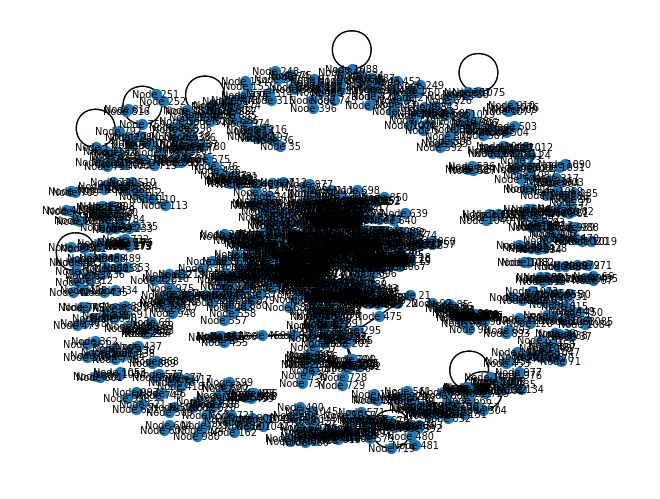

Cantidad de nodos: 1091
Cantidad de aristas: 1877


In [40]:
G = generate_graph(similar_pairs)

In [29]:
print(len(G.nodes()))
print(len(G.edges()))

1091
1877


In [30]:
print(len(G.nodes()),G.nodes())
print(len(G.edges()),G.edges())

1091 ['convicted murderer billy chemirmir killed by cellmate in texas prison tdcj', 'man suspected of murdering people killed by cellmate in prison officials', 'the shadow race to succeed mitch mcconnell', 'the race to carve up the moon', 'a field guide to the borderlands hispanicheritagemonth latinxheritagemonth', 'the marketer s ultimate guide to link bait', 'from revolution to constitution', 'how to move from windows to chromeos', 'hanania on how to drive a stake into woke', 'how to delegate', 'what the clinton haters on the left get wrong', 'gen v what s going on in the woods ', 'how ideology can help or hurt movements trying to build power', 'catturd was swatted by the left', 'was the creator written by ai ', 'how to atone for tel aviv ', 'how not to apply for a software job', 'how much tiktok pays for views according to creators', 'how to write quality content for e commerce website x faster', 'how much does it cost to file for bankruptcy ', 'i testified at the biden impeachment 

In [31]:
!pip install pyfim
!pip install cdlib
from fim import *
from cdlib import algorithms
from cdlib import viz
from cdlib import evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp310-cp310-linux_x86_64.whl size=644243 sha256=28803a70bbf37cbefebb6dc7a6c057391d2a7c480365b65a7f08217e38b77498
  Stored in directory: /root/.cache/pip/wheels/96/0a/b3/c877bfa85c4cfe1baf3de4a89e1949382be09de5eabe49314f
Successfully built pyfim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.0 MB/s eta 0:00:00
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg', 'graph_tool', 'bayanpy'}
Note: to be able to use all 

In [32]:
louvain_com = algorithms.louvain(G, weight='weight')

In [33]:
#mostrar la modularidad general
print(louvain_com.modularity_density())
#mostrar la modularidad de cada comunidad
print(louvain_com.internal_edge_density(summary=False))

FitnessResult(min=None, max=None, score=327.5276606007162, std=None)
[0.07039573820395738, 0.03878942881500426, 0.08627450980392157, 0.12657004830917876, 0.27464008859357697, 0.31341463414634146, 0.0858974358974359, 0.07956989247311828, 0.1330049261083744, 0.10582010582010581, 0.11375661375661375, 0.26666666666666666, 0.18095238095238095, 0.1523809523809524, 0.2, 0.2, 0.37777777777777777, 0.2222222222222222, 0.2222222222222222, 0.2857142857142857, 0.5238095238095238, 0.2857142857142857, 0.6190476190476191, 0.8571428571428571, 0.2857142857142857, 0.4, 0.4, 0.7333333333333333, 0.3333333333333333, 0.4666666666666667, 0.4666666666666667, 0.4, 0.4, 0.4, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6666666666666666, 0.8333333333333334, 0.5, 0.5, 0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666

El rango de página de este grafo

In [34]:
pagerank = nx.pagerank(G)
print(pagerank)

{'convicted murderer billy chemirmir killed by cellmate in texas prison tdcj': 0.0009165902841429881, 'man suspected of murdering people killed by cellmate in prison officials': 0.0009165902841429881, 'the shadow race to succeed mitch mcconnell': 0.000623631787066807, 'the race to carve up the moon': 0.0015889174341401004, 'a field guide to the borderlands hispanicheritagemonth latinxheritagemonth': 0.0009165902841429881, 'the marketer s ultimate guide to link bait': 0.0009165902841429881, 'from revolution to constitution': 0.0002958026945329838, 'how to move from windows to chromeos': 0.000587611171380627, 'hanania on how to drive a stake into woke': 0.00027064478694476684, 'how to delegate': 0.004453212276139845, 'what the clinton haters on the left get wrong': 0.0005245500162312138, 'gen v what s going on in the woods ': 0.0018739161237042925, 'how ideology can help or hurt movements trying to build power': 0.0009165902841429881, 'catturd was swatted by the left': 0.0006069721968838

Cuentas más importantes según su PageRank


In [35]:
pagerank = nx.pagerank(G)
print(pagerank)

{'convicted murderer billy chemirmir killed by cellmate in texas prison tdcj': 0.0009165902841429881, 'man suspected of murdering people killed by cellmate in prison officials': 0.0009165902841429881, 'the shadow race to succeed mitch mcconnell': 0.000623631787066807, 'the race to carve up the moon': 0.0015889174341401004, 'a field guide to the borderlands hispanicheritagemonth latinxheritagemonth': 0.0009165902841429881, 'the marketer s ultimate guide to link bait': 0.0009165902841429881, 'from revolution to constitution': 0.0002958026945329838, 'how to move from windows to chromeos': 0.000587611171380627, 'hanania on how to drive a stake into woke': 0.00027064478694476684, 'how to delegate': 0.004453212276139845, 'what the clinton haters on the left get wrong': 0.0005245500162312138, 'gen v what s going on in the woods ': 0.0018739161237042925, 'how ideology can help or hurt movements trying to build power': 0.0009165902841429881, 'catturd was swatted by the left': 0.0006069721968838

In [36]:
import operator
pagerank_ordenado = sorted(pagerank.items(), key=operator.itemgetter(1), reverse=True)
print(pagerank_ordenado[:10])

[('the importance of mentorship', 0.0047306814237815156), ('how to delegate', 0.004453212276139845), ('hands on with the google pixel pixel pro and pixel watch ', 0.0033944876706210043), ('the best october amazon prime day deals for ', 0.0032543153653147383), ('what can you connect to the iphone with usb c ', 0.0029337244752714086), ('insider today a trillion disaster', 0.0028588634802206784), ('the writers guild of america strike is over', 0.0027235086717078702), ('iphone and iphone pro how to use all the new features', 0.002699348612987669), (' ways to prepare for the future of work', 0.0025027661309296764), ('apple watch series vs google pixel watch', 0.0024797100874627692)]
